The [Hugging Face Hub](https://huggingface.co/models) contains numerous models:



Some of the currently available pipelines are:

1. **Feature Extraction** - Extracts feature vectors from input text.
2. **Text Classification** - Assigns a label to a text from a predefined set of categories (e.g., sentiment analysis).
3. **Token Classification** - Identifies entities, parts of speech, or other token-level attributes (e.g., named entity recognition).
4. **Question Answering** - Answers questions based on a given context.
5. **Fill-Mask** - Predicts the missing word in a text with a masked token.
6. **Summarization** - Produces a concise summary of a longer text.
7. **Translation** - Translates text from one language to another.
8. **Text Generation** (text2text-generation) - Generates text based on a prompt.
9. **Conversation** - Manages dialogue or conversation.
10. **Zero-Shot Classification** - Classifies text into categories without specific training on those categories.
11. **Table Question Answering** - Answers questions based on tabular data.
12. **Text2Text Generation** - Converts one form of text to another (e.g., summarization, translation).
13. **Image Classification** - Assigns a label to an image from a set of predefined categories.
14. **Image Segmentation** - Divides an image into segments to simplify or change the representation of an image into something more meaningful.
15. **Audio Classification** - Categorizes audio clips.
16. **Automatic Speech Recognition (ASR)** - Transcribes spoken language into text.
17. **Voice Activity Detection** - Detects human speech activity in audio.
18. **Object Detection** - Identifies objects within an image and their locations.

This notebook provides the practical usage of the Transformers library by walking you through the instantiation and application of the pipeline functions with concise examples.

### Installation

In [ ]:
pip install transformers

- ## Feature Extraction

Feature extraction is a critical step in many NLP tasks, where text is converted into numerical vectors that encapsulate semantic meanings. The Hugging Face Transformers library offers a `feature-extraction` pipeline, which simplifies the process of deriving dense vector representations from text, suitable for applications like document similarity, clustering, and more.

**Applications:**

- Document Clustering: Use cosine similarity between document vectors for grouping.
- Information Retrieval: Match query vectors with document vectors to improve search results.
- Data Visualization: Apply dimensionality reduction (like PCA or t-SNE) to visualize text data clusters.

In [ ]:
from transformers import pipeline

# Initialize the feature extraction pipeline
feature_extractor = pipeline('feature-extraction')

# Example text
text = "Forecasting energy demand is crucial for grid stability."

# Execute feature extraction
features = feature_extractor(text)


# Print the first 5 features of the first token for illustration
print(features[0][0][:5])


No model was supplied, defaulted to distilbert/distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


[0.34515753388404846, 0.07146427035331726, -0.11499103903770447, -0.18635904788970947, -0.4904000461101532]


- ## Text Classification

Text classification involves categorizing text into one or more categories, which can be used for sorting content, identifying spam, or determining sentiment. The Hugging Face Transformers library simplifies text classification through its `text-classification` pipeline, making it accessible to apply powerful models like BERT, RoBERTa, or DistilBERT for classifying texts.

**Applications:**

- Sentiment Analysis: Quickly determine the sentiment expressed in social media posts, reviews, or comments.
- Topic Discovery: Automatically tag articles, blogs, or documents with relevant topics or categories.
- Spam Detection: Classify emails or messages as spam, making email filters more efficient.

In [ ]:
from transformers import pipeline

# Initialize the text classification pipeline
classifier = pipeline('text-classification')

# Example text
text = "Innovative solar panel designs increase efficiency."

# Perform classification
result = classifier(text)

# Output the classification result
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998263716697693}]


- ## Token Classification
Token classification tasks involve labeling individual tokens (like words) within a text according to their grammatical properties or semantic roles. Common applications include Named Entity Recognition (NER), where tokens are classified as names of persons, organizations, locations, etc. The Hugging Face Transformers library offers a straightforward token-classification pipeline to tackle these tasks using pre-trained models.

**Applications:**

- Enhanced Content Analysis: By identifying specific entities, enhance content analysis for better information extraction.
- Data Enrichment: Enrich database records with structured information extracted from unstructured text.
- Compliance Monitoring: Automatically detect sensitive or regulated information in texts.

In [ ]:
from transformers import pipeline

# Initialize the token classification pipeline with a pre-trained model
ner_pipeline = pipeline('ner', model='dbmdz/bert-large-cased-finetuned-conll03-english')

# Example text
text = "Daniel is interning as Generative AI Engineer in Hamoye.com."

# Execute token classification
results = ner_pipeline(text)

# Print results to show tagged entities
for result in results:
    print(f"Word: {result['word']}, Entity: {result['entity']}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Word: Daniel, Entity: I-PER
Word: Ham, Entity: I-ORG
Word: ##oy, Entity: I-ORG
Word: ##e, Entity: I-ORG
Word: ., Entity: I-ORG
Word: com, Entity: I-ORG


- ## Question Answering
The Question Answering (QA) task involves the model reading a passage of text and then answering questions based on that text. It's a way to extract specific information from a corpus, akin to a human looking up answers in a book. The Hugging Face Transformers library simplifies the implementation of QA with its 'question-answering' pipeline, which utilizes models trained on QA datasets like SQuAD (Stanford Question Answering Dataset).

**Applications:**

- Customer Support Automation: Automate responses to frequently asked questions by providing instant, accurate answers.
- Educational Tools: Develop applications that help students learn by providing instant answers to their questions from educational materials.
- Research Efficiency: Quickly extract answers from large documents or datasets, saving time and effort in manual searches.

In [ ]:
from transformers import pipeline

# Initialize the question answering pipeline
qa_pipeline = pipeline('question-answering')

# Provide context and question
context = "Hugging Face is a technology company based in New York and Paris, focusing on natural language processing technologies."
question = "Where is Hugging Face based?"

# Perform question answering
answer = qa_pipeline(question=question, context=context)

# Display the answer
print(f"Answer: {answer['answer']}")


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Answer: New York and Paris


- ## Fill-Mask
The Fill-Mask pipeline enables models to predict missing words in a text, simulating a "cloze test" often used in language learning. This task not only showcases the language understanding capabilities of models but also serves as a fundamental tool for more complex text generation and modification tasks. The Transformers library provides a simple interface to use models like BERT, RoBERTa, or DistilBERT that are fine-tuned on masked language modeling.

**Aplications**
- Content Generation: Aid in content creation by suggesting words to complete sentences.
- Language Learning: Use in educational tools to help language learners practice and test their knowledge of vocabulary in context.
- Text Editing and Improvement: Automatically suggest replacements or enhancements for words in texts to improve clarity or style.

In [ ]:
from transformers import pipeline

# Initialize the fill-mask pipeline
mask_filler = pipeline('fill-mask', model='bert-base-uncased')

# Example text with a masked token (note the model-specific mask token)
text = "Hugging Face is creating a [MASK] that democratizes AI."

# Perform mask filling
results = mask_filler(text)
results


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'score': 0.1101706251502037,
  'token': 4132,
  'token_str': 'platform',
  'sequence': 'hugging face is creating a platform that democratizes ai.'},
 {'score': 0.0616423673927784,
  'token': 3226,
  'token_str': 'culture',
  'sequence': 'hugging face is creating a culture that democratizes ai.'},
 {'score': 0.043470121920108795,
  'token': 2832,
  'token_str': 'process',
  'sequence': 'hugging face is creating a process that democratizes ai.'},
 {'score': 0.041933540254831314,
  'token': 2291,
  'token_str': 'system',
  'sequence': 'hugging face is creating a system that democratizes ai.'},
 {'score': 0.028378009796142578,
  'token': 2451,
  'token_str': 'community',
  'sequence': 'hugging face is creating a community that democratizes ai.'}]

In [ ]:
# Display the top predictions for the masked token
for result in results:
    print(f"Token: {result['token_str']}, Score: {result['score']:.2f}")

Token: platform, Score: 0.11
Token: culture, Score: 0.06
Token: process, Score: 0.04
Token: system, Score: 0.04
Token: community, Score: 0.03


In [ ]:
from transformers import pipeline
fill_mask = pipeline("fill-mask")
result = fill_mask("To reduce losses in high-voltage power lines, the resistance must be <mask>.")
result

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.0870048999786377,
  'token': 2906,
  'token_str': ' reduced',
  'sequence': 'To reduce losses in high-voltage power lines, the resistance must be reduced.'},
 {'score': 0.06717315316200256,
  'token': 6647,
  'token_str': ' overcome',
  'sequence': 'To reduce losses in high-voltage power lines, the resistance must be overcome.'},
 {'score': 0.04883446916937828,
  'token': 41774,
  'token_str': ' minimized',
  'sequence': 'To reduce losses in high-voltage power lines, the resistance must be minimized.'},
 {'score': 0.035354141145944595,
  'token': 1130,
  'token_str': ' increased',
  'sequence': 'To reduce losses in high-voltage power lines, the resistance must be increased.'},
 {'score': 0.035309191793203354,
  'token': 13813,
  'token_str': ' strengthened',
  'sequence': 'To reduce losses in high-voltage power lines, the resistance must be strengthened.'}]

- ## Summarization
The Summarization pipeline is designed to assist in reducing lengthy documents into essential takeaways, proving invaluable in today’s fast-paced world where time is a premium. By leveraging models trained on `summarization` tasks, this pipeline helps users quickly grasp the main points of a text, enhancing productivity and understanding.

**Aplications**
- Information Digestion: Quickly summarize reports, articles, or documents to save time and enhance information absorption.
- Educational Tools: Provide summaries of lengthy educational materials to aid in learning and review.
- Business Intelligence: Summarize business and research documents to facilitate quicker decision-making and insights.

In [ ]:
from transformers import pipeline

# Initialize the summarization pipeline
summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

# Example long text
text = """
Hugging Face is a technology company based in New York and Paris, focusing on natural language processing technologies.
They have developed several popular tools and libraries to assist developers and researchers in building state-of-the-art machine learning models,
particularly in the field of natural language understanding and generation. Their tools are widely used in the industry and academia and have
contributed to the democratization of artificial intelligence by making high-quality, cutting-edge technologies available to a broad range of users.
"""

# Perform summarization
summary = summarizer(text, max_length=45, min_length=30, do_sample=False)

# Display the summary
print("Summary:", summary[0]['summary_text'])


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Summary: Hugging Face is a technology company based in New York and Paris. They have developed several popular tools and libraries to assist developers and researchers in building state-of-the-art machine learning models.


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")

summary = summarizer("The project involves the installation of 500 wind turbines, expected to generate around 800MW of power. The environmental assessment suggests minimal impact on local wildlife.", max_length=15, min_length=10, do_sample=False)
summary

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' The project involves the installation of 500 wind turbines, expected to'}]

- ## Translation
The Translation pipeline unlocks the potential of language models to bridge linguistic barriers, facilitating clear and effective cross-language communication. Utilizing state-of-the-art models like those based on the T5 or Marian framework, this pipeline can translate text between multiple languages with high accuracy, supporting a wide array of applications.

**Applications:**

- Global Communication: Facilitate communication across different language speakers in international settings.
- Content Localization: Adapt content to meet the linguistic preferences of different regions, enhancing accessibility and engagement.
- Learning and Education: Provide educational resources in multiple languages to support diverse learning needs.

In [ ]:
from transformers import pipeline

#English-to-french
translator = pipeline("translation_en_to_fr")

translation = translator("Hugging Face is a technology company.")
translation

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:171: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on google-t5/t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Hugging Face est une entreprise technologique.'}]

In [ ]:
from transformers import pipeline

# Initialize the translation pipeline
# Here I use the model for English to German translation
translator = pipeline('translation_en_to_de', model='t5-base')

# Example text in English
text = "To talk around the broth"

# Perform translation
translation = translator(text)

# Display the translated text
print("Translated Text:", translation[0]['translation_text'])


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Translated Text: Um die Brühe zu reden


- ## Zero-Shot Classification

Zero-Shot Classification leverages the broad understanding of language models to categorize text into predefined classes without prior explicit example-based training on those classes. It’s particularly beneficial in scenarios where you need to classify text into multiple categories that were not included in the model's original training data.

**Aplications**

- Content Categorization: Automatically sort articles, research papers, or web content into thematic categories.
- Customer Feedback Analysis: Classify feedback into topics to better understand consumer needs without predefined categories.
- Social Media Monitoring: Track and categorize opinions or discussions across various themes on social platforms.

In [ ]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline
classifier = pipeline('zero-shot-classification')

# Example text and candidate labels
text = "I am using a very innovative AI model."
labels = ["education", "politics", "technology"]

# Perform classification
classification = classifier(text, candidate_labels=labels)
classification

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'I am using a very innovative AI model.',
 'labels': ['technology', 'education', 'politics'],
 'scores': [0.9949050545692444, 0.003592904657125473, 0.0015019983984529972]}

In [ ]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

# Example text
text = "Hugging Face creates cutting-edge machine learning models for natural language processing."

# Candidate labels
labels = ["education", "technology", "healthcare", "politics"]

# Perform classification
results = classifier(text, candidate_labels=labels, multi_label=True)

# Display classification results
print("Labels:", results['labels'])
print("Scores:", results['scores'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Labels: ['technology', 'healthcare', 'education', 'politics']
Scores: [0.994943380355835, 0.006877794396132231, 0.0018409412587061524, 0.001568236737512052]


- ## Text Generation
Text Generation, enabled by models such as GPT (Generative Pre-trained Transformer), allows for the automated creation of text that can mimic human writing styles, respond to user inputs, or even generate creative stories. This pipeline is instrumental in driving innovations in AI-powered communication and content creation.

**Applications:**

- Creative Writing: Assist authors by generating story ideas, dialogue, or entire sections of text.
- Marketing Content Creation: Automatically produce engaging and varied promotional text.
- Customer Support Automation: Generate responses to customer inquiries, reducing response times and easing workload on human agents.

In [ ]:
from transformers import pipeline
generator = pipeline("text-generation")
generated_text = generator("The future of energy storage lies in", max_length=50, truncation=True)
generated_text

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The future of energy storage lies in providing energy independent sources that do not depend on the presence of any external input like water, hydroelectricity, natural gas or fossil fuels. The same kind of information can be used to create batteries to store the power'}]

In [ ]:
from transformers import pipeline

# Initialize the text generation pipeline with a pre-trained model
generator = pipeline('text-generation', model='gpt2')

# Example prompt
prompt = "As a leader in energy technology, we strive to innovate by"

# Generate text based on the prompt
generated_text = generator(prompt, max_length=100, num_return_sequences=1)

# Display the generated text
for i, text in enumerate(generated_text):
    print(f"Generated Text {i+1}: {text['generated_text']}")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text 1: As a leader in energy technology, we strive to innovate by doing nothing but innovate. That's why I'm very proud that I'm the co-creator and co-CEO of the energy-efficiency system of the World Bank.


- ## Conversation

Creating conversational AI involves more than just responding to queries; it requires understanding the context and maintaining the flow of the conversation. The Conversation pipeline in the Transformers library is designed to facilitate this by generating context-aware responses in a dialogue format.

**Applications:**

- Customer Service Bots: Engage with customers to answer inquiries, provide support, or guide them through complex processes.
- Interactive Storytelling: Create characters that can interact with users in real-time within a narrative.
- Educational Tutors: Develop AI tutors that can converse with students to clarify concepts and answer questions interactively.

In [ ]:
from transformers import pipeline

conversational_pipeline = pipeline("conversational")

from transformers import Conversation

conversation = Conversation("What is your name?")
conversation.add_user_input("My name is Daniel.")

response = conversational_pipeline(conversation)
response

No model was supplied, defaulted to microsoft/DialoGPT-medium and revision 8bada3b (https://huggingface.co/microsoft/DialoGPT-medium).
Using a pipeline without specifying a model name and revision in production is not recommended.
User input added while unprocessed input was existing: "What is your name?" new input ignored: "My name is Daniel.". Set `overwrite` to True to overwrite unprocessed user input
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


Conversation id: fd96567f-b344-450d-a9b7-ad21f593b21f
user: What is your name?
assistant: I'm not sure, but I think it's a reference to the movie The Big Lebowski.

In [ ]:
from transformers import pipeline, Conversation

# Initialize the conversation pipeline with a suitable model
conversational_pipeline = pipeline('conversational', model='microsoft/DialoGPT-medium')

# Start a conversation and add the initial message
conversation = Conversation()
conversation.add_user_input("Hello, how can I assist you today?")

# Generate the initial response
conversational_pipeline(conversation)

# Add another user input and generate the response
conversation.add_user_input("Tell me more about your energy technologies.")
conversational_pipeline(conversation)

# Display the dialogue so far
print("Dialogue so far:")
for step in conversation:
    print(step)

# Add another user input
conversation.add_user_input("What are the latest trends in renewable energy?")

# Generate response
conversational_pipeline(conversation)

# Display updated dialogue
print("Updated Dialogue:")
for step in conversation:
    print(step)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` t

Dialogue so far:
{'role': 'user', 'content': 'Hello, how can I assist you today?'}
{'role': 'assistant', 'content': "I'm not sure what you mean by that."}
{'role': 'user', 'content': 'Tell me more about your energy technologies.'}
{'role': 'assistant', 'content': "I'm not sure what you mean by that."}
Updated Dialogue:
{'role': 'user', 'content': 'Hello, how can I assist you today?'}
{'role': 'assistant', 'content': "I'm not sure what you mean by that."}
{'role': 'user', 'content': 'Tell me more about your energy technologies.'}
{'role': 'assistant', 'content': "I'm not sure what you mean by that."}
{'role': 'user', 'content': 'What are the latest trends in renewable energy?'}
{'role': 'assistant', 'content': "I'm not sure what you mean by that."}


- ## Table Question Answering
Table Question Answering transforms the way we interact with tabular data by enabling natural language queries on structured datasets. This capability is highly beneficial in domains such as finance, healthcare, and business analytics, where decision-makers need to extract insights from complex data tables quickly.

**Applications:**
- Business Intelligence: Quickly query sales, inventory, or financial data to make informed decisions.
- Health Data Management: Extract patient statistics or treatment data without sifting through complex databases manually.
- Academic Research: Analyze large datasets in fields like economics or social sciences more efficiently.


In [ ]:
from transformers import pipeline

# Initialize the table question answering pipeline
table_qa_pipeline = pipeline('table-question-answering', model='google/tapas-large-finetuned-wtq')

# Define the table data as a list of dictionaries
data = [
    {"Country": "USA", "Capital": "Washington D.C.", "Population": "331 million"},
    {"Country": "China", "Capital": "Beijing", "Population": "1.4 billion"},
    {"Country": "India", "Capital": "New Delhi", "Population": "1.38 billion"}
]

# Example query
query = "What is the capital of China?"

# Perform the query on the table
answer = table_qa_pipeline({"table": data, "query": query})

# Display the answer
print("Answer:", answer['answer'])


config.json:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

Answer: Beijing


- ## Text2Text Generation
Text2Text Generation models serve a broad range of applications from translating technical documents to generating synthetic data for training models. In the energy sector, where the accuracy and contextual understanding of technical documents, research papers, and patent descriptions are crucial, Text2Text models can help streamline workflows and enhance communication across global teams.

**Aplications:**
- Documentation Translation: Instantly translate technical specifications and manuals for equipment used across different countries.
- Report Generation: Automate the writing of standardized reports on energy production statistics, making them easy to generate and customize.
- Creative Descriptions: Generate innovative descriptions for new technologies, aiding in marketing and patent filings.

In [ ]:
from transformers import pipeline

# Initialize the Text2Text Generation pipeline
text2text_generator = pipeline('text2text-generation', model='t5-base')

# Example: Translate an English sentence to a synthetic but contextually similar one
input_text = "As a leader in energy technology, our new solar panel design increases efficiency by 20%."
output_text = text2text_generator("translate English to German: " + input_text)[0]['generated_text']

# Display the translated text
print("Translated Text:", output_text)


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Translated Text: Als führender Anbieter von Energietechnologien steigert unser neues Solarpanel-Design die Eff


- ## Image Classification
Image Classification models harness the power of AI to interpret visual data, an essential capability in the energy industry. These models can automate the analysis of diverse imagery—from satellite photos capturing solar farm layouts to thermal images for equipment inspection—enhancing accuracy and efficiency.

**Applications:**
- Site Selection: Automatically classify land areas suitable for solar farms or wind turbines based on geographical and infrastructural characteristics.
- Maintenance Monitoring: Use drone-captured images to classify and identify sections of energy infrastructure in need of repair.
- Environmental Impact Studies: Classify images to monitor environmental changes around energy sites, ensuring compliance with regulations.


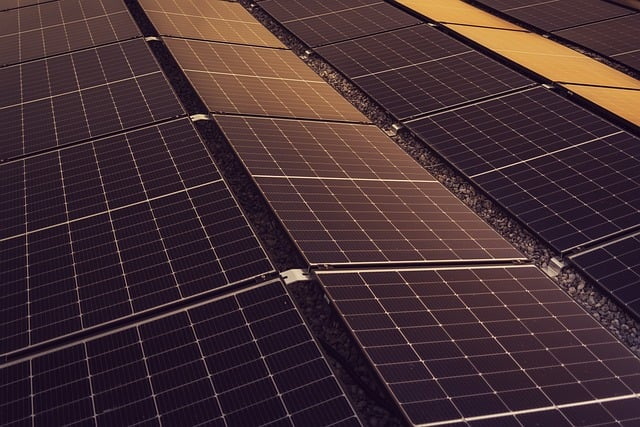

Classification Results:
Label: solar dish, solar collector, solar furnace, Confidence: 0.99
Label: tile roof, Confidence: 0.00
Label: dome, Confidence: 0.00
Label: vault, Confidence: 0.00
Label: planetarium, Confidence: 0.00


In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# Load an image from the web
image_url = "https://cdn.pixabay.com/photo/2023/09/10/11/16/solar-8244680_640.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
display(image)

# Initialize the Image Classification pipeline
image_classifier = pipeline('image-classification', model='google/vit-base-patch16-224')

# Classify the image
results = image_classifier(image)

# Print the results
print("Classification Results:")
for result in results:
    print(f"Label: {result['label']}, Confidence: {result['score']:.2f}")


- ## Audio Classification
Audio classification harnesses AI to automatically categorize different types of sounds. For energy companies, this technology could be instrumental in predictive maintenance and environmental monitoring.

**Applications:**
- Healthcare: Detect anomalies in heartbeats or breathing patterns.
- Urban Planning: Monitor urban noise levels to improve living conditions.
- Customer Service: Classify and route customer calls based on detected query types.
- Machinery Monitoring: Detect and classify sounds from energy equipment to predict failures and schedule maintenance.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import librosa

In [ ]:
# Install required libraries if not already available in Colab
!pip install transformers librosa

from transformers import pipeline
import librosa
from google.colab import files

# Upload a file from your local file system to Colab
uploaded = files.upload()
audio_filename = next(iter(uploaded))  # Get the filename of uploaded file

# Load an audio file
audio_path = audio_filename
audio, rate = librosa.load(audio_path, sr=None)  # Load with the original sample rate

# Initialize the Audio Classification pipeline
audio_classifier = pipeline('audio-classification', model='superb/hubert-large-superb-er')

# Classify the audio clip
results = audio_classifier({"array": audio, "sampling_rate": rate})

# Display the classification results
for result in results:
    print(f"Label: {result['label']}, Score: {result['score']:.2f}")


Saving scanner-1.mp3 to scanner-1.mp3


config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

Label: hap, Score: 0.84
Label: sad, Score: 0.09
Label: neu, Score: 0.06
Label: ang, Score: 0.00


- ## Automatic Speech Recognition (ASR)
Automatic Speech Recognition (ASR) is a crucial capability in the field of natural language processing (NLP) facilitated by the Transformers library. ASR technology converts spoken language into text, which is immensely useful in numerous applications such as voice-driven interfaces, transcribing meetings or lectures, and enabling voice control of devices.

**Applications:**
- Voice-Activated Assistants: Implementing ASR allows developers to create or enhance voice-activated user interfaces in apps and devices.
- Meeting and Lecture Transcriptions: Automatically transcribe spoken content in meetings or lectures, creating accessible written records and saving manual transcription efforts.
- Accessibility Technologies: Improve accessibility for those who are hearing impaired by providing real-time transcription of spoken words.
- Legal and Medical Dictation: Professionals in fields like law and medicine can dictate notes and have them transcribed instantly, improving efficiency.

In [ ]:
from transformers import pipeline
import librosa  # for loading audio files
from google.colab import files

# Upload a file from your local file system to Colab
uploaded = files.upload()
recorded_voice = next(iter(uploaded))  # Get the filename of uploaded file

# Load an audio file (ensure the file is in WAV format or compatible with the model)
audio_path = recorded_voice
audio, rate = librosa.load(audio_path, sr=16000)  # Load with the target sample rate

# Initialize the ASR pipeline
asr_pipeline = pipeline('automatic-speech-recognition', model='facebook/wav2vec2-base-960h')

# Transcribe the audio clip
transcription = asr_pipeline({"array": audio, "sampling_rate": rate})

# Display the transcription
print("Transcription:", transcription['text'])


Saving Recording (2).m4a to Recording (2).m4a


<ipython-input-13-249918e57bcc>:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(audio_path, sr=16000)  # Load with the target sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you

Transcription: MY NAME IS OYOALI DANIO I FINISHD FROM FREDERI INVESTYOU OF THE CLERGY ACUWELL I AM BASED IN LEGO'S NAJUIA I AM I TAPA SCIENTIST INTERESTED KEENLY IN DEEP LENNID THANK YOU


- ## Voice Activity Detection
Voice Activity Detection (VAD) is an essential function in the field of audio processing and speech technology, allowing systems to detect the presence or absence of human speech within an audio stream. This capability is crucial for enhancing the efficiency of speech recognition systems by enabling them to focus processing resources on segments of audio that contain speech.

**Applications:**
- Telecommunications: Improve call quality and bandwidth usage by enabling dynamic audio streaming rates based on whether speech is present.
- Speech Recognition Systems: Enhance performance by focusing computational resources on segments of audio that contain speech.
- Security Systems: Monitor environments for sounds of human activity as part of comprehensive security measures.
- Healthcare Monitoring: Detect speaking periods in patient monitoring systems, which can help in diagnosing and treating conditions like sleep apnea.

In [ ]:
from transformers import pipeline
from google.colab import files
import librosa

# Upload the file
uploaded = files.upload()
audio_filename = next(iter(uploaded))  # Get the filename of the uploaded file

# Load the audio file using librosa
audio, rate = librosa.load(audio_filename, sr=16000)  # Ensure to resample to the appropriate rate if necessary

# Load the audio file using librosa
audio, rate = librosa.load(audio_filename, sr=16000)  # Ensure to resample to the appropriate rate if necessary

# Initialize the VAD pipeline
vad_pipeline = pipeline("audio-classification", model="superb/hubert-large-superb-sid")

# Prepare audio data for the pipeline (assuming the model accepts raw waveform input)
audio_data = {"array": audio, "sampling_rate": rate}

# Perform voice activity detection
vad_results = vad_pipeline(audio_data)

# Display the results
print("Voice Activity Detection Results:")
for result in vad_results:
    label = result["label"]
    score = result["score"]
    print(f"Detected '{label}' with confidence {score:.2f}")


Saving Recording (3).m4a to Recording (3).m4a


<ipython-input-14-38d6f1101207>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(audio_filename, sr=16000)  # Ensure to resample to the appropriate rate if necessary
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-14-38d6f1101207>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(audio_filename, sr=16000)  # Ensure to resample to the appropriate rate if necessary
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-large-superb-sid were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-sid and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.paramet

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

Voice Activity Detection Results:
Detected 'id10305' with confidence 0.52
Detected 'id10733' with confidence 0.46
Detected 'id10633' with confidence 0.02
Detected 'id10269' with confidence 0.00
Detected 'id10413' with confidence 0.00


- ## Object Detection
Object Detection is a critical task in the field of computer vision, where the goal is to identify and localize multiple objects within an image. This technology is used across a wide range of applications, from autonomous vehicles and security systems to medical imaging and retail.

**Applications:**
- Autonomous Vehicles: Object detection is critical for identifying obstacles, pedestrians, and traffic signs to assist with navigation and safety.
- Security and Surveillance: Enhances monitoring capabilities by detecting unauthorized access or identifying suspicious objects within a monitored area.
- Retail Analytics: Automates inventory management and monitors customer behavior to optimize store layout and product placement.
- Healthcare: Facilitates medical diagnosis by identifying and classifying anomalies in medical imaging, such as tumors in X-rays or MRIs

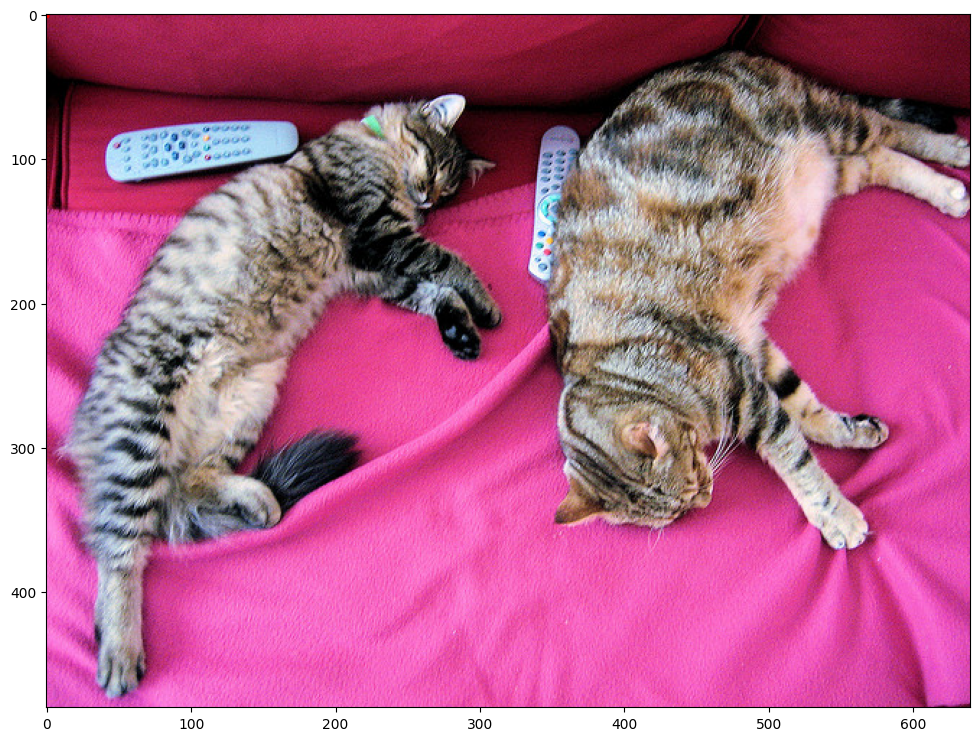

In [ ]:
# Import necessary libraries
import torch
from transformers import pipeline
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Download an image from the web
url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

# Load YOLOS model and processor
image_processor = YolosImageProcessor.from_pretrained('hustvl/yolos-small-300')
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-small-300')

# Prepare image for model input
inputs = image_processor(images=image, return_tensors="pt")

# Ensure the model is in evaluation mode
model.eval()

# Perform object detection without tracking gradients
with torch.no_grad():
    outputs = model(**inputs)

# Get logits and bounding boxes
logits = outputs.logits
bboxes = outputs.pred_boxes

# Detach bounding boxes and move to CPU for processing
bboxes_np = bboxes.detach().cpu().numpy()

# Set up the plot
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Add bounding boxes to the plot
for bbox in bboxes_np[0]:
    xmin, ymin, xmax, ymax = bbox
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()


- ## Image Segmentation
Image Segmentation models dissect complex visual information, segmenting images into meaningful parts. For the energy industry, this capability can enhance inspections, maintenance, and planning, by providing granular visual data analysis.

**Applications:**
- Infrastructure Analysis: Automatically segment parts of energy infrastructure for condition assessment and fault detection.
- Vegetation Management: Detect and segment areas of vegetation encroachment near power lines to prioritize maintenance and prevent outages.
- Land Use Planning: Segment land use types in images to better plan the locations for new energy projects, considering geographical and ecological factors.